In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr

In [ ]:
ad=pd.read_csv('Advertising.csv')
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
ad.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
ad=ad.drop(columns="Unnamed: 0", axis=1)

In [ ]:
ad.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [ ]:
ad.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [ ]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
ad.duplicated().sum()

0

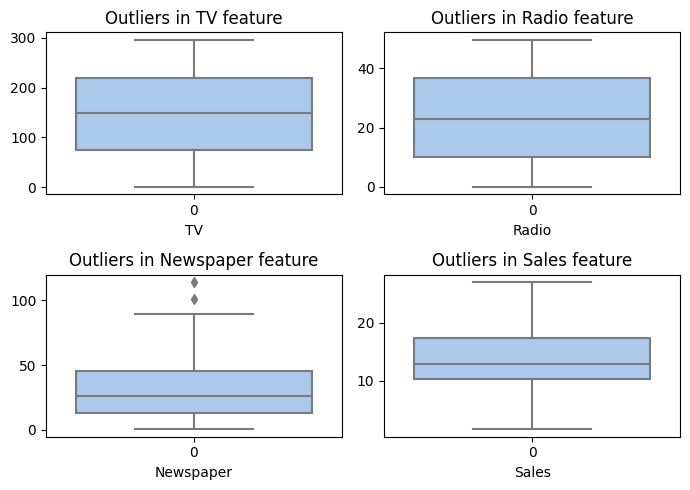

In [ ]:
plt.figure(figsize=(7,5))
columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}
for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=ad[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

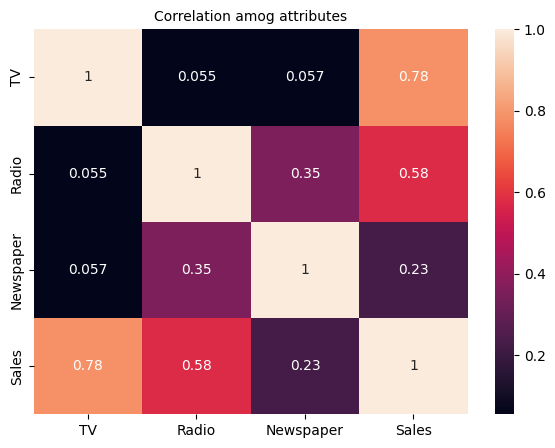

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(ad.corr(),annot=True).set_title('Correlation amog attributes',fontsize=10)
plt.show()

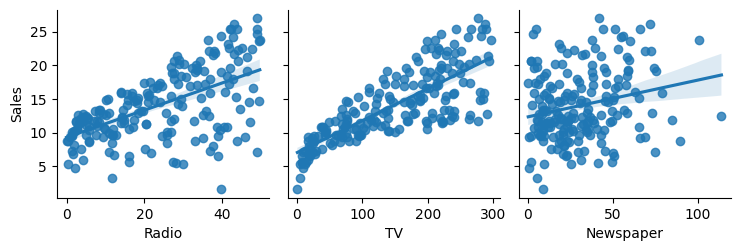

In [ ]:
sns.pairplot(data=ad,x_vars=["Radio","TV", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

In [ ]:
X=ad.drop(columns="Sales",axis=1)

In [ ]:
y=ad["Sales"]

In [ ]:
a=LabelEncoder()
y=a.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Linear-Ridge-Lasso Regression model

In [ ]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 108.88563941729085
R2 Score: 0.9137298616704539
Cross-Validation R2: 0.8829076766313095


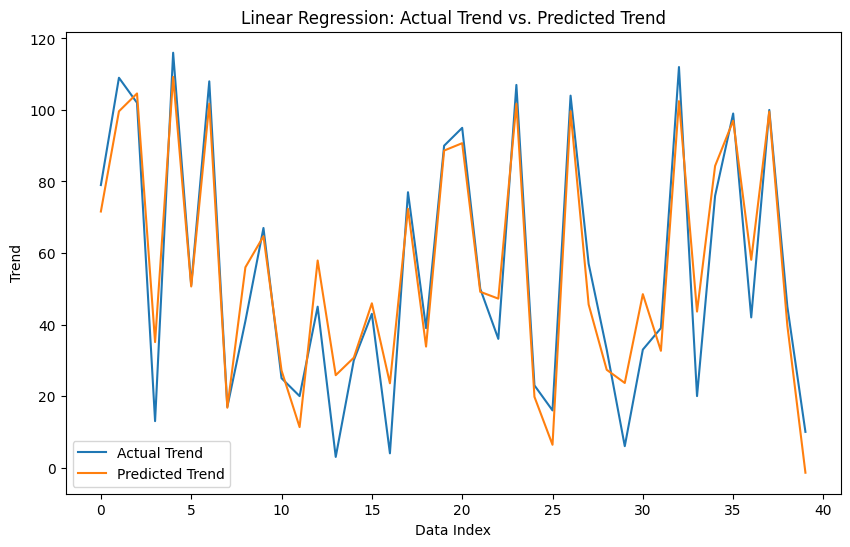


Ridge Regression
Mean Squared Error: 124.16557474271458
R2 Score: 0.9016235624261708
Cross-Validation R2: 0.8744917309227282


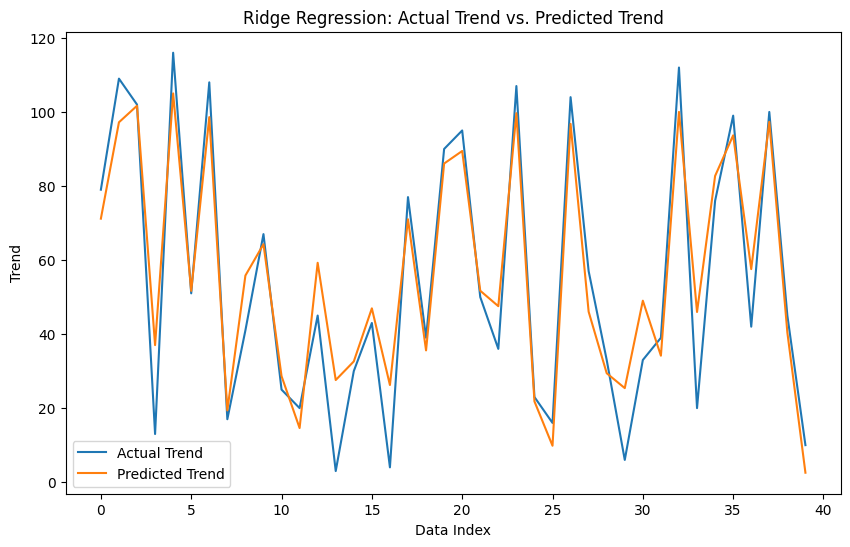


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross-Validation R2: 0.8556271875371658


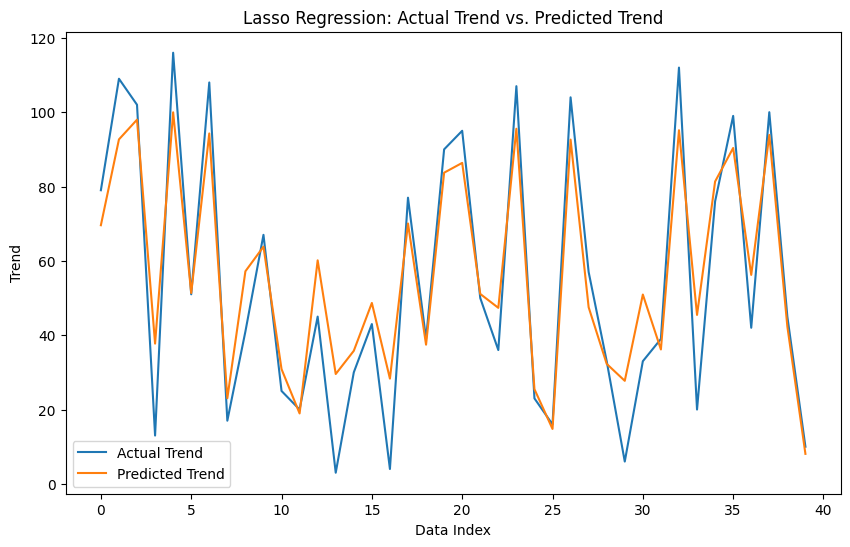

In [ ]:
for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("Mean_squared_error:",mean_squared_error(y_test,y_pred))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean_absolute_error: 9.769308225392297
Mean_squared_error: 152.65126991931305
Squre_Mean_absolute_error: 3.1255892605062967
r2_score: 0.8790543340462877


##SVM-model

In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 476.20028507406204
R^2 Score: 0.6227063120007272


In [ ]:
correlation_coefficient, _ = pearsonr(y_test, pred)
print('Correlation Coefficient:', correlation_coefficient)

Correlation Coefficient: 0.8777469883506948


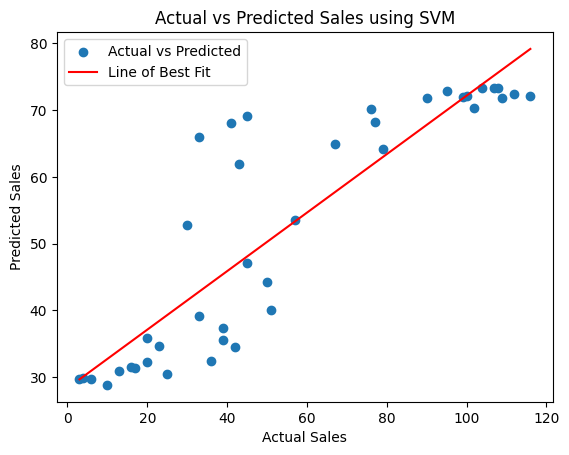

In [ ]:
plt.scatter(y_test, pred, label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred, 1))(np.unique(y_test)), color='red', label='Line of Best Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales using SVM')
plt.legend()
plt.show()